In [18]:
import pickle
import pandas as pd
import numpy as np
#CountVectorizer --> Bag of words
#TfidfVectorizer --> Tf-IDF
#gensim.models.Word2Vec --> word embeddings (word2vec)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

### Load the Models 

In [19]:
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/nb_bow.sav'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/nb_tfidf.sav'
file3 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/nb_w2v.sav'
file4 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/knn_bow.sav'
file5 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/knn_tfidf.sav'
file6 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/knn_w2v.sav'
file7 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/svm_bow.sav'
file8 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/svm_tfidf.sav'
file9 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/New Models/svm_w2v.sav'
nb_bow = pickle.load(open(file1, 'rb'))
nb_tfidf = pickle.load(open(file2, 'rb'))
nb_w2v = pickle.load(open(file3, 'rb'))
knn_bow = pickle.load(open(file4, 'rb'))
knn_tfidf = pickle.load(open(file5, 'rb'))
knn_w2v = pickle.load(open(file6, 'rb'))
svm_bow = pickle.load(open(file7, 'rb'))
svm_tfidf = pickle.load(open(file8, 'rb'))
svm_w2v = pickle.load(open(file9, 'rb'))

### Load the X and Y label

In [20]:
df = pd.read_csv('preprocessed_data.csv')
X = df['cleaned_reviews']
Y = df['sentiment']
X.fillna('', inplace=True)

### Load the vectorizers

In [21]:
# Load the saved vectorizers
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/bow'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/tfidf'

bow = pickle.load(open(file1, 'rb'))
tfidf = pickle.load(open(file2, 'rb'))

#load the Word2Vec
w2v = Word2Vec.load('D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/w2v')

In [22]:
# Transform the data using the loaded vectorizers
X_bow = bow.transform(X)
X_tfidf = tfidf.transform(X)
#creating sentence vector:
def sentence_to_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:  # If the sentence contains no words in the model's vocabulary
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Create vectors for all sentences
X_w2v = np.array([sentence_to_vector(sentence, w2v) for sentence in X])

### Splitting the Data set

In [23]:
#test_size = 0.2 --> 20% of the data goes for testing and the remaing 80% goes for traning
#random_state = 42 --> ensures that the data is split in the same random way across all code runs-> this ensures efficient debugging
X_train_bow, X_test_bow, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,_, _ = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v,_, _ = train_test_split(X_w2v, Y, test_size=0.2, random_state=42)

### Predict the results produced by various combinations

In [24]:
#Naive bayes
nb_pred_bow = nb_bow.predict(X_test_bow)
nb_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_pred_w2v = nb_w2v.predict(X_test_w2v)
#KNN
knn_pred_bow = knn_bow.predict(X_test_bow)
knn_pred_tfidf = knn_tfidf.predict(X_test_tfidf)
knn_pred_w2v = knn_w2v.predict(X_test_w2v)
#SVM
svm_pred_bow = svm_bow.predict(X_test_bow)
svm_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
svm_pred_w2v = svm_w2v.predict(X_test_w2v)

#### Accuracy

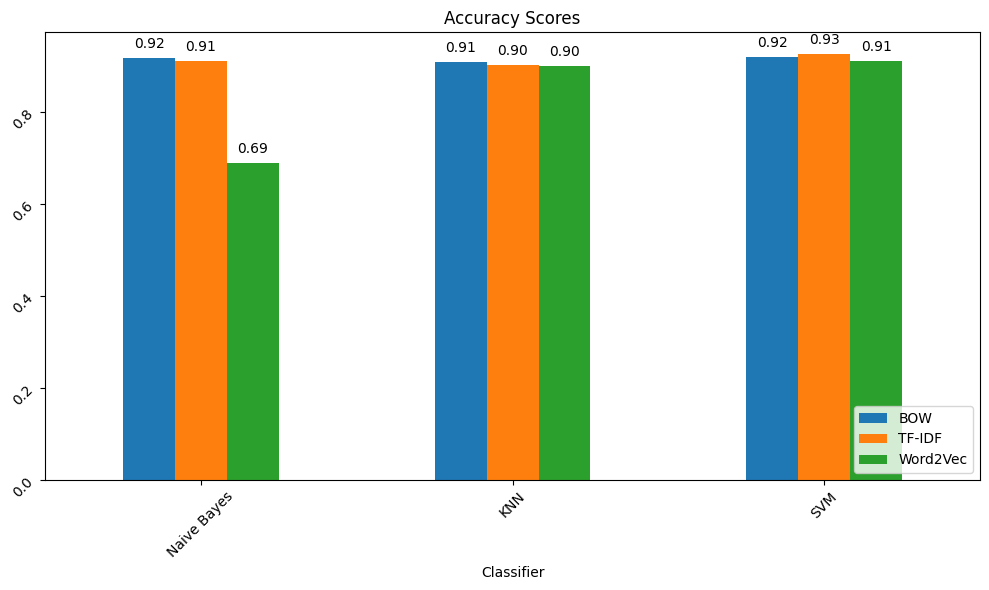

In [25]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

# Data for DataFrame
accuracy_data = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [accuracy_score(Y_test, nb_pred_bow), accuracy_score(Y_test, knn_pred_bow), accuracy_score(Y_test, svm_pred_bow)],
    "TF-IDF" : [accuracy_score(Y_test, nb_pred_tfidf), accuracy_score(Y_test, knn_pred_tfidf), accuracy_score(Y_test, svm_pred_tfidf)],
    "Word2Vec": [accuracy_score(Y_test, nb_pred_w2v), accuracy_score(Y_test, knn_pred_w2v), accuracy_score(Y_test, svm_pred_w2v)]
}

accuracy_df  = pd.DataFrame(accuracy_data)
ax = accuracy_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)

# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('Accuracy Scores')
plt.show()

### Precision


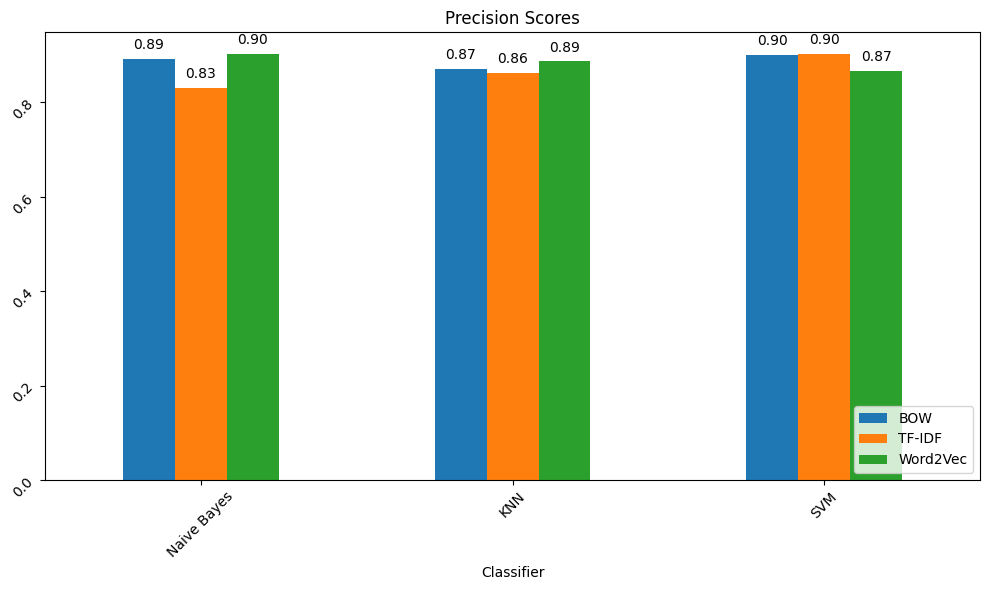

In [26]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
# Precision
precision_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [precision_score(Y_test, nb_pred_bow, average='weighted'), precision_score(Y_test, knn_pred_bow, average='weighted'), precision_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [precision_score(Y_test, nb_pred_tfidf, average='weighted'), precision_score(Y_test, knn_pred_tfidf, average='weighted'), precision_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [precision_score(Y_test, nb_pred_w2v, average='weighted'), precision_score(Y_test, knn_pred_w2v, average='weighted'), precision_score(Y_test, svm_pred_w2v, average='weighted')]
}
precision_df = pd.DataFrame(precision_data)
ax = precision_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('Precision Scores')
plt.show()

### Recall

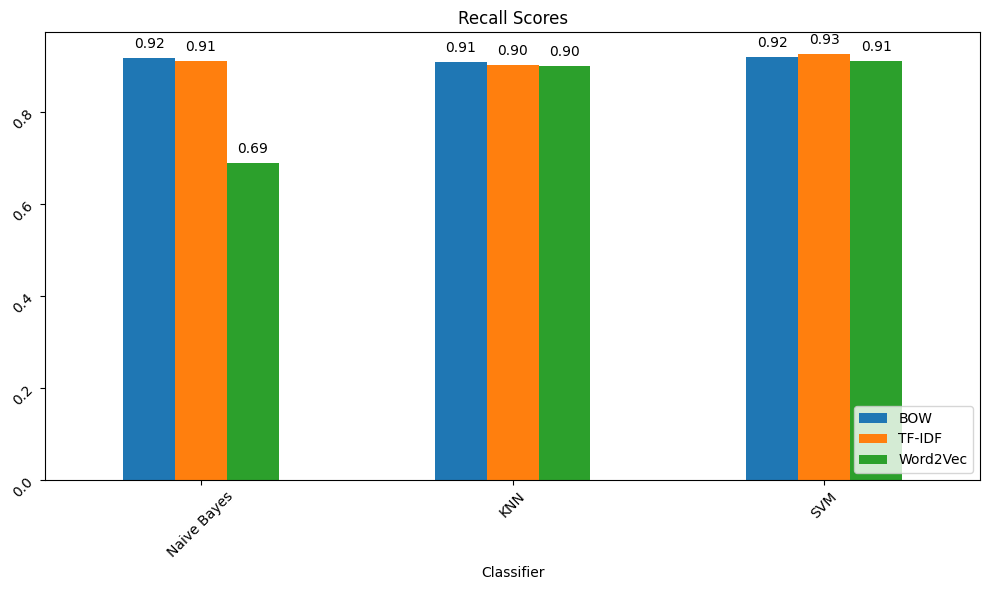

In [27]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
# Recall
recall_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [recall_score(Y_test, nb_pred_bow, average='weighted'), recall_score(Y_test, knn_pred_bow, average='weighted'), recall_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [recall_score(Y_test, nb_pred_tfidf, average='weighted'), recall_score(Y_test, knn_pred_tfidf, average='weighted'), recall_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [recall_score(Y_test, nb_pred_w2v, average='weighted'), recall_score(Y_test, knn_pred_w2v, average='weighted'), recall_score(Y_test, svm_pred_w2v, average='weighted')]
}

recall_df = pd.DataFrame(recall_data)
ax = recall_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('Recall Scores')
plt.show()

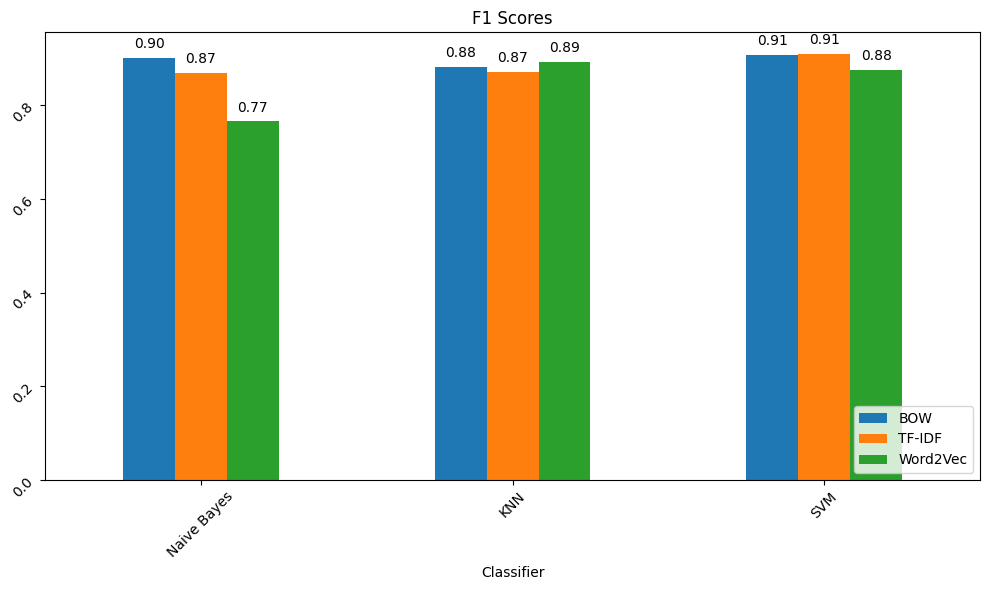

In [28]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
# F1-Score
f1_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [f1_score(Y_test, nb_pred_bow, average='weighted'), f1_score(Y_test, knn_pred_bow, average='weighted'), f1_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [f1_score(Y_test, nb_pred_tfidf, average='weighted'), f1_score(Y_test, knn_pred_tfidf, average='weighted'), f1_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [f1_score(Y_test, nb_pred_w2v, average='weighted'), f1_score(Y_test, knn_pred_w2v, average='weighted'), f1_score(Y_test, svm_pred_w2v, average='weighted')]
}

f1_df = pd.DataFrame(f1_data)
ax = f1_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
# Annotate each bar with the value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('F1 Scores')
plt.show()